# Carga y observacion del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [4]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BB52B50>,
      dtype=object)

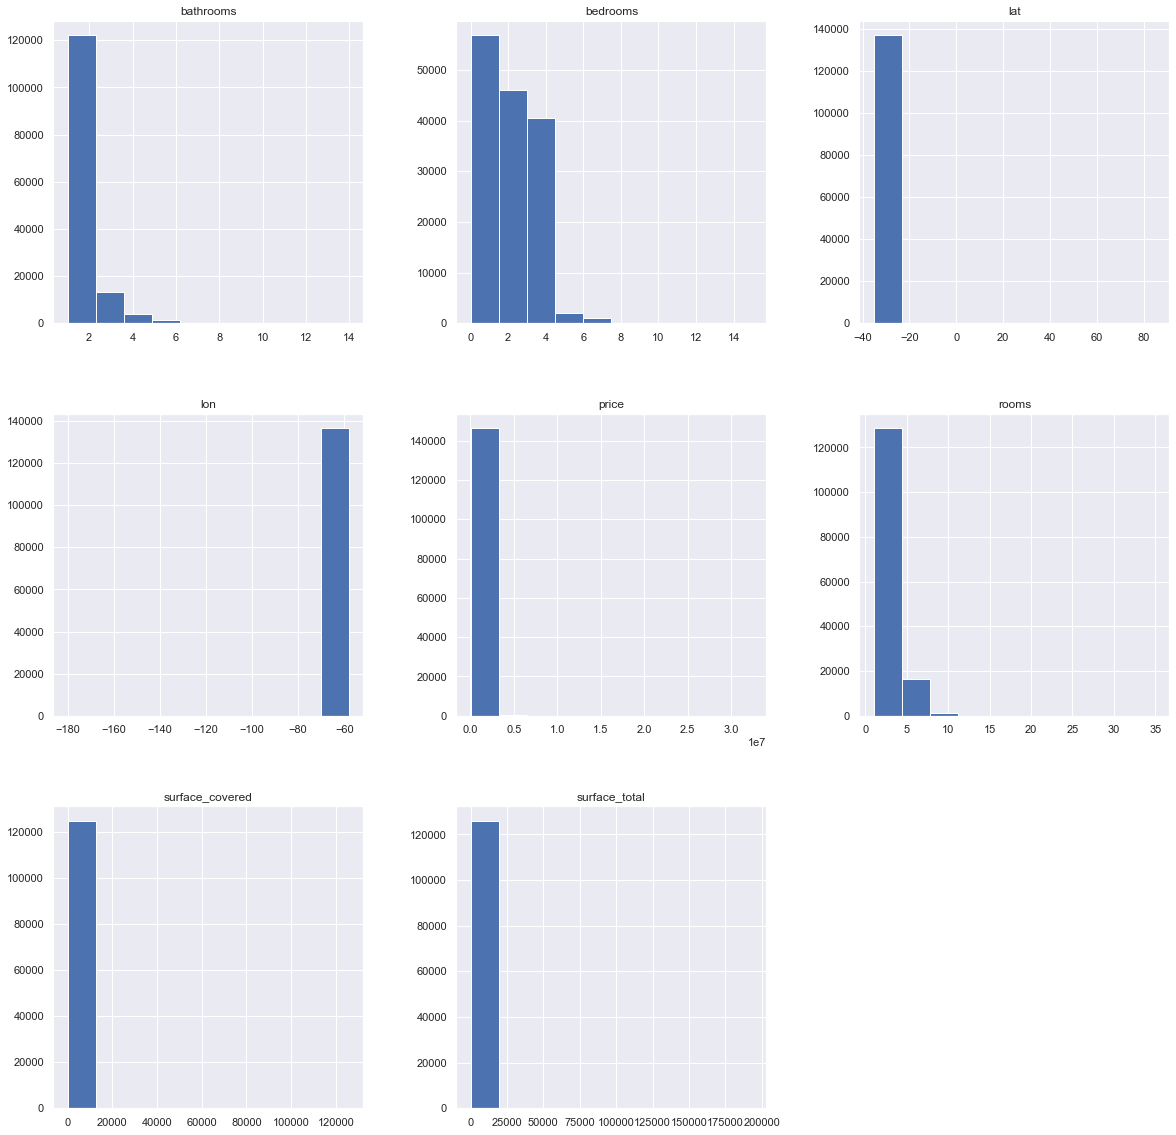

In [5]:
data.hist(figsize = (20,20))

.

PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

Detección y eliminación de Outliers

Encoding

Imputación de valores faltantes

Escalado de datos

Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado . Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

# Transformaciones del Proyecto 1 

In [6]:
ultimo=data


In [7]:
#Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
tipos_propiedad=data.property_type.value_counts().index[:3].to_list()
ultimo=ultimo[(data.l2=='Capital Federal') & (data.property_type.isin(tipos_propiedad))]
ultimo.shape

(91485, 19)

In [8]:
# Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2, y precio menor a  4000000 dolares.
ultimo=ultimo[(ultimo.surface_total <=1000) & (ultimo.surface_total>=15) & (ultimo.price<=4000000)]

In [9]:
#Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
ultimo=ultimo.iloc[:,8:14]

In [10]:
#Descarta aquellas instacias con valores faltantes.
ultimo=ultimo.dropna(axis=0)
ultimo.reset_index(drop=True,inplace=True)

In [11]:
ultimo.shape

(81019, 6)

### Modelos Proyecto 1

In [12]:
X_proyecto = ultimo.loc[:, ['rooms', 'bedrooms', 'bathrooms','surface_total','surface_covered']]

In [13]:
y_proyecto = ultimo.loc[:, ['price']]

In [14]:
from sklearn.model_selection import train_test_split


X_train_proyecto, X_test_proyecto, y_train_proyecto, y_test_proyecto = train_test_split(X_proyecto, y_proyecto, test_size=0.30, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Arbol de decision

El r2 sobre el set de entrenamiento: 0.9677981207550042
El r2 sobre el set de evaluacion: 0.7640414126922683
El error absoluto medio sobre el set de entrenamiento: 23729.28230188677
El error absoluto medio sobre el set de evaluacion: 51106.26096635346



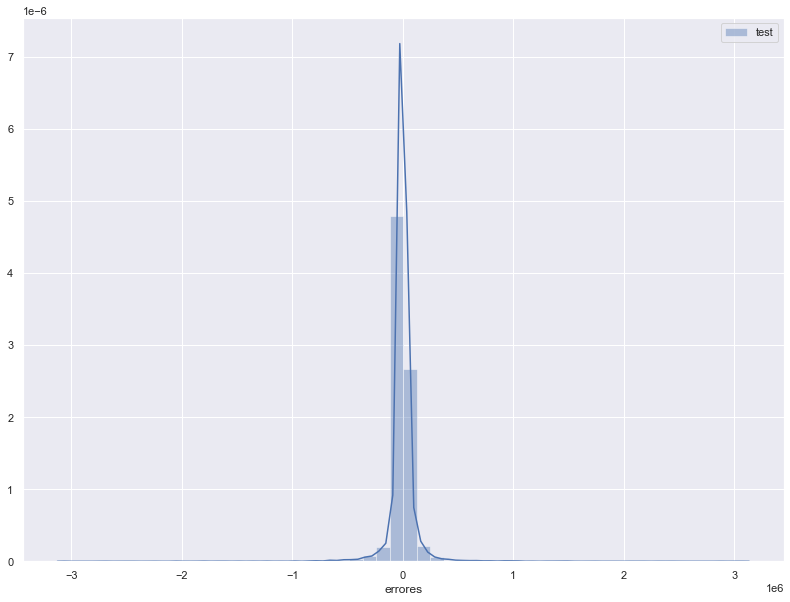

In [17]:
tree_regressor = DecisionTreeRegressor(max_depth=23, random_state=362)
tree_regressor.fit(X_train_proyecto, y_train_proyecto)
y_train_pred_proyecto = tree_regressor.predict(X_train_proyecto)
y_test_pred_proyecto = tree_regressor.predict(X_test_proyecto)


train_maxe = r2_score(y_train_proyecto, y_train_pred_proyecto)
test_maxe = r2_score(y_test_proyecto, y_test_pred_proyecto)
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)


train_mae = mean_absolute_error(y_train_proyecto, y_train_pred_proyecto)
test_mae = mean_absolute_error(y_test_proyecto, y_test_pred_proyecto)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()



plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot((y_test_proyecto) -(y_test_pred_proyecto).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

### Vecinos mas cercanos

In [20]:
knn_regressor = KNeighborsRegressor(n_neighbors=7,weights='distance',p=1)
knn_regressor.fit(X_train_proyecto, y_train_proyecto)
y_train_pred_proyecto = knn_regressor.predict(X_train_proyecto)
y_test_pred_proyecto = knn_regressor.predict(X_test_proyecto)

El r2 sobre el set de entrenamiento: 0.9664284438106173
El r2 sobre el set de evaluacion: 0.7959557478047647
El error absoluto medio sobre el set de entrenamiento: 24120.73024056801
El error absoluto medio sobre el set de evaluacion: 49889.734567116124



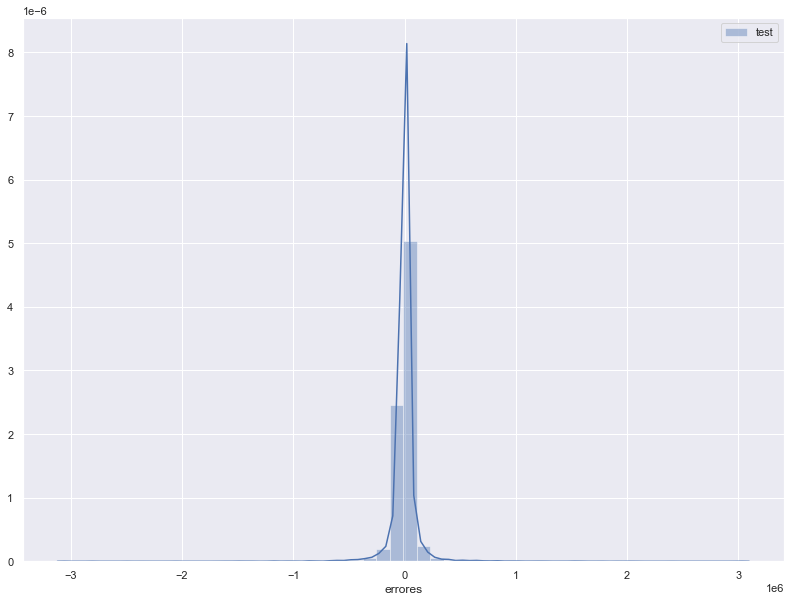

In [21]:
train_maxe = r2_score(y_train_proyecto, y_train_pred_proyecto)
test_maxe = r2_score(y_test_proyecto, y_test_pred_proyecto)
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)


train_mae = mean_absolute_error(y_train_proyecto, y_train_pred_proyecto)
test_mae = mean_absolute_error(y_test_proyecto, y_test_pred_proyecto)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()



plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot((y_test_proyecto) -(y_test_pred_proyecto).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

#### Estas son las transformaciones propuestas en el proyecto 1. Como vemos en el modelo de vecinos mas cercanos (el mejor modelo) tenemos un r2 de 0,795, un error absoluto medio de 49889 y podemos ver la distribucion de los errores. Estas metricas son las que vamos a evaluar despues en los proximos modelos y con respecto a ellas veremos si las transformaciones de datos que hicimos sirvieron. Ahora proseguimos con las transformaciones que yo creo que van a mejorar a nuestro modelo.

# Parte A

## Deteccion y eliminacion de outliers

In [6]:
dataset_sin_dup = data.drop_duplicates()
print(f'Numero de instancias duplicadas', data.shape[0]-dataset_sin_dup.shape[0])
print(f'Numero de instancias del dataset filtrado', dataset_sin_dup.shape[0])

Numero de instancias duplicadas 2358
Numero de instancias del dataset filtrado 144302


In [7]:
data_copia=dataset_sin_dup
wrong_surface_rows = data_copia.loc[data_copia.surface_total < data_copia.surface_covered]
len(wrong_surface_rows)


1431

In [8]:
data_copia.loc[wrong_surface_rows.index, 'surface_total'] = wrong_surface_rows.surface_covered
data_copia.loc[wrong_surface_rows.index, 'surface_covered'] = wrong_surface_rows.surface_total

C:\Users\Martin\miniconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
data_copy=data_copia

In [10]:
data_copy.shape

(144302, 19)

In [11]:
columnas = data_copy.columns.tolist()
lista_numerica = []
lista_categorica = []
for x in range(0,len(data_copy.columns))  :
    if data_copy[columnas[x]].dtype == 'int64'or data_copy[columnas[x]].dtype == 'float64':
        lista_numerica.append(columnas[x])
    else:
        lista_categorica.append(columnas[x])

In [12]:
lista_numerica.remove('lat')
lista_numerica.remove('lon')


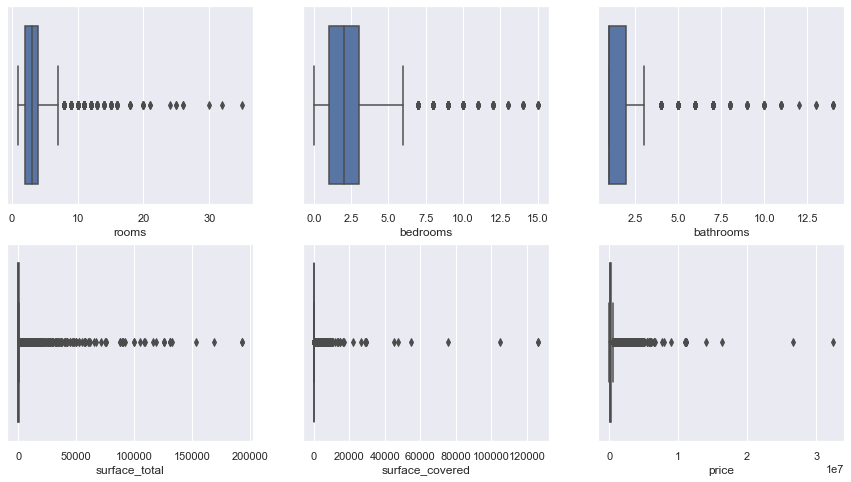

In [13]:
fig = plt.figure(figsize=(15,8))
i=0
for columns in lista_numerica:
    i=i+1
    ax = fig.add_subplot(2, 3, i)
    sns.boxplot(data_copy[columns])


In [14]:
def limpiar_dataframee(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    dfout=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

    
    return dfout

In [15]:
def limpiar_dataframe(dataframe, columna):
    q25 = dataframe[columna].quantile(0.25)
    q75 = dataframe[columna].quantile(0.75)
    iqr = q75 - q25
    if (q25 -(1.5 * iqr)) < 0:
        IQMenor = 0.0
    else:
        IQMenor = float(q25 - (1.5 * iqr))

    IQMayor = float(q75 + (1.5 * iqr))
    
    dataframe = dataframe[(dataframe[columna] > IQMenor ) &
        (dataframe[columna] < IQMayor)]
    
    return dataframe

In [16]:
#for i in lista_numerica:
    #data_copy=limpiar_dataframe(data_copy,i) #utilizamos el rango intercuartilico porque la regla de las 3 sigmas no limpia bien las superficies y el preci

In [17]:
data_copy= limpiar_dataframee(data_copy)

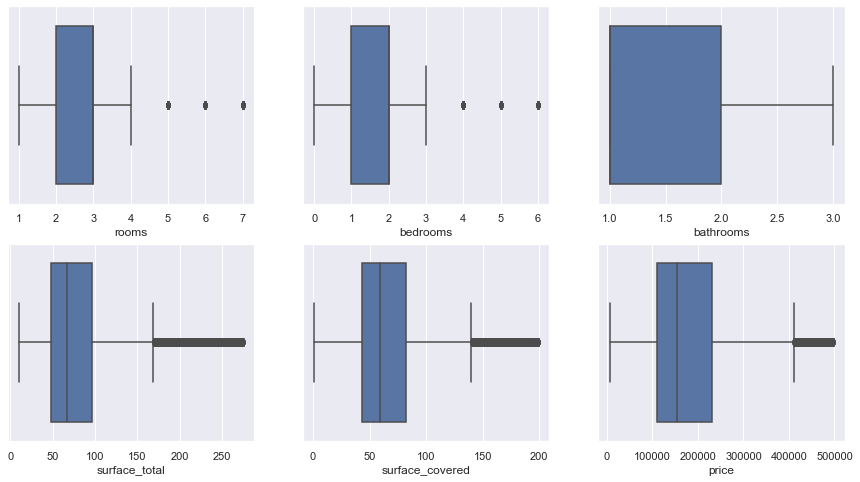

In [18]:
fig = plt.figure(figsize=(15,8))
i=0
for columns in lista_numerica:
    i=i+1
    ax = fig.add_subplot(2, 3, i)
    sns.boxplot(data_copy[columns])

In [19]:
data_copy.reset_index(drop=True,inplace=True)
data_copy.shape

(97999, 19)

#### Hacemos una limpieza de los outliers ya que vemos la distribucion de los datos en un boxplot y la visualizacion de los datos es muy pobre. Cuando hacemos la limpieza la visualizacion del boxplot queda mucho mas limpia y clara. Tambien se eliminarion las filas repetidas y las filas donde la superficie cubierta era mayor que la total.

## Imputacion de valores faltantes

In [20]:
def valores_faltantes(df):
    total = df.isnull().sum().sort_values(ascending=False)
    porcentaje = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
    porcentaje = round(porcentaje, 2)
    valores_faltantes = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje %'])
    return valores_faltantes


In [21]:
valores_faltantes(data_copy)

,Total,Porcentaje %
surface_covered,12588,12.85
surface_total,12180,12.43
lon,7531,7.68
lat,7499,7.65
bathrooms,3355,3.42
operation_type,0,0.00
l3,0,0.00
end_date,0,0.00
created_on,0,0.00
l1,0,0.00


In [22]:
data_copia=data_copy

In [23]:
data_copia.lon.fillna(0,inplace=True)
data_copia.lat.fillna(0,inplace=True)

C:\Users\Martin\miniconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [24]:
data_copia.reset_index(drop=True,inplace=True)

##### La latitud y la longitud no son relevantes para nuestro estudio por eso las rellenamos con 0.

In [25]:
valores_faltantes(data_copia) #Nota:podemos usar KNNImputer 

,Total,Porcentaje %
surface_covered,12588,12.85
surface_total,12180,12.43
bathrooms,3355,3.42
operation_type,0,0.00
l3,0,0.00
end_date,0,0.00
created_on,0,0.00
lat,0,0.00
lon,0,0.00
l1,0,0.00


In [26]:
nulos=data_copia[['surface_covered','surface_total','bathrooms']].copy()

In [27]:
nulos.corr()

,surface_covered,surface_total,bathrooms
surface_covered,1.000000,0.889201,0.599924
surface_total,0.889201,1.000000,0.529977
bathrooms,0.599924,0.529977,1.000000


In [28]:
data_copia.bathrooms.fillna(round(float(data_copia.bathrooms.median())),inplace=True)
data_copia.surface_total.fillna(float(data_copia.surface_total.median()),inplace=True)
data_copia.surface_covered.fillna(float(data_copia.surface_covered.median()),inplace=True)  #median mejor que mode y mean

C:\Users\Martin\miniconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [29]:
data_copia.reset_index(drop=True,inplace=True)

In [30]:
valores_faltantes(data_copia)

,Total,Porcentaje %
operation_type,0,0.0
rooms,0,0.0
end_date,0,0.0
created_on,0,0.0
lat,0,0.0
lon,0,0.0
l1,0,0.0
l2,0,0.0
l3,0,0.0
bedrooms,0,0.0


In [31]:
data_copia.shape

(97999, 19)

#### Llenamos los valores faltantes con la mediana. Aprovechamos que los valores faltantes no son muchos y los llenamos. Vemos que mejora la precision del modelo si no nos deshacemos de las filas que tienen valores nulos por eso vale la pena hacerlo. Tambien tenemos muchos valores faltantes, estariamos perdiendo muchos datos.

## Encoding

In [32]:
df=data_copia.copy()

In [33]:
#from sklearn.preprocessing import OneHotEncoder

In [34]:
#one = OneHotEncoder(sparse = False)


In [35]:
#def onehot(dataframe,columna): # para one hot encoder
    #tipos=dataframe[columna].to_numpy()
    #tipos=tipos.reshape(-1,1)
    #tipos_coded=one.fit_transform(tipos)
    #dataframe[columna] = tipos_coded
    #return dataframe

In [36]:
#tipos=df['property_type'].to_numpy() # para one hot encoder
#tipos= tipos.reshape(-1,1)
#tipos_coded=one.fit_transform(tipos)
#print(tipos_coded)

In [37]:
columns= ['l2', 'l3','property_type']
for x in columns: 
    tipos=df[x]
    tipos_coded= pd.get_dummies(tipos, columns=[x])
    df = df.join(tipos_coded)


In [38]:
df.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,Casa,Casa de campo,Cochera,Departamento,Depósito,Local comercial,Lote,Oficina,Otro,PH
0,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
df=df.drop(columns,axis=1)

#### Encodeamos l2, l3 y property type para poder utilizarlas en nuestros modelos. Vemos que sirve ya que mejoran muchisimo la precision de estos. 

## Modelos

In [40]:
modelos= df.copy()

In [41]:
modelos=modelos.drop(['start_date','end_date','created_on','lat','lon','l1','currency','title','description','operation_type'],axis=1)

In [42]:
X= modelos.loc[:,:].drop('price',axis=1)
X.shape

(97999, 108)

In [43]:
y=modelos.loc[:,['price']]
y.shape

(97999, 1)

In [44]:
cor=modelos.corr()
cor_lista = abs(cor["price"])
importantes = cor_lista[cor_lista>0.1]
importantes.sort_values(ascending= False)

price                       1.000000
surface_covered             0.637167
bathrooms                   0.604050
surface_total               0.566258
rooms                       0.557127
bedrooms                    0.539961
Bs.As. G.B.A. Zona Oeste    0.196657
Recoleta                    0.163364
Palermo                     0.152808
Capital Federal             0.148577
Belgrano                    0.147686
Tres de Febrero             0.138749
Puerto Madero               0.129335
Name: price, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Escalado de datos

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [47]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#### Si bien el escalado de datos para el arbol de decision no es necesario, cuando utilizemos otros modelos va a ser util porque va a mejorar su precision si llevamos todas las features a la misma 'unidad de medida'. Se realiza el escalado de datos despues de la division en X_train y X_test.

### Reduccion de dimensionalidad

In [48]:
from sklearn.decomposition import TruncatedSVD

In [49]:
for i in range(1,10,1):
    SVD=TruncatedSVD(n_components=i,random_state=42,n_iter=5)
    SVD.fit(X)
    print(str(i),str(SVD.explained_variance_ratio_.sum()))

1 0.9399027341628301
2 0.9987363310099818
3 0.9991952343379967
4 0.9993737672624813
5 0.9994581760601717
6 0.999524169841607
7 0.999564017925059
8 0.999602593204526
9 0.9996369972480791


In [50]:
svd=TruncatedSVD(n_components=10,random_state=42,n_iter=7)

In [51]:
X_trun_train=svd.fit_transform(X_train)
X_trun_test=svd.transform(X_test)

In [52]:
#X_train=X_trun_train
#X_test=X_trun_test

In [53]:
from sklearn.decomposition import PCA


In [54]:
for i in range(1,10,1):
        pca = PCA(n_components=i)
        pca.fit(X)
        print(str(i),str(pca.explained_variance_ratio_.sum()))

1 0.945031715563357
2 0.998939335294717
3 0.9992959451938348
4 0.9993985575649462
5 0.999482950861365
6 0.9995464531282826
7 0.9995854009410791
8 0.9996235776122001
9 0.9996502991237173


In [55]:
columnas1=['rooms','bedrooms','bathrooms','surface_total','surface_covered']
columnas2=data['l2'].unique().tolist()
columnas3=data['property_type'].unique().tolist()
columnas4=data['l3'].unique().tolist()

In [56]:
for i in range(1,4,1):
        pca = PCA(n_components=i)
        pca.fit(X[columnas2])
        print(str(i),str(pca.explained_variance_ratio_.sum()))

1 0.6528812873021843
2 0.8940878115752043
3 0.9999999999994513


In [57]:
for i in range(1,10,1):
        pca = PCA(n_components=i)
        pca.fit(X[columnas3])
        print(str(i),str(pca.explained_variance_ratio_.sum()))

1 0.7472629971026987
2 0.9501845606506167
3 0.9752745756616316
4 0.9845819041894894
5 0.990292589071248
6 0.9943261827903964
7 0.9976414869423512
8 0.9999623879750807
9 1.0


In [58]:
for i in range(1,10,1):
        pca = PCA(n_components=i)
        pca.fit(X[columnas4])
        print(str(i),str(pca.explained_variance_ratio_.sum()))

1 0.10597814723551915
2 0.1781417193407872
3 0.24137920349805667
4 0.3006700600118033
5 0.35281342120172277
6 0.39637651180490496
7 0.429469019664934
8 0.46097074213027867
9 0.4912692532336863


#### Tratamos de reducir las features de los barrios, zonas y tipos de propiedad, pero el puntaje nos da muy bajo asi que combiene truncar el dataset entero.

In [59]:
pca = PCA(n_components=3)
X_pca_train=pca.fit_transform(X_train)
X_train=X_pca_train
X_pca_test=pca.transform(X_test)
X_test=X_pca_test

#### La reduccion de dimensionalidad nos sirve para reducir el costo cumputacional ya que en vez de trabajar con 108 columnas pasamos a trabajar con 3. La reduccion de dimensionalidad se va a utilizar nada mas para poder correr la optimizacion de parametros, porque en realidad nos empeora nuestros modelos.

### Modelo arbol de decision (Proyecto 1)

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

In [61]:
arbol = DecisionTreeRegressor(max_depth=23, random_state=42)
arbol.fit(X_train, y_train.values.ravel())

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=23,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [62]:
scores1 = cross_validate(arbol, X_train, y_train.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

El r2 sobre el set de entrenamiento: 0.9532644571163325
El r2 sobre el set de evaluacion: 0.725446509289787

El error absoluto medio sobre el set de entrenamiento: 9432.504732147765
El error absoluto medio sobre el set de evaluacion: 27647.00803339223



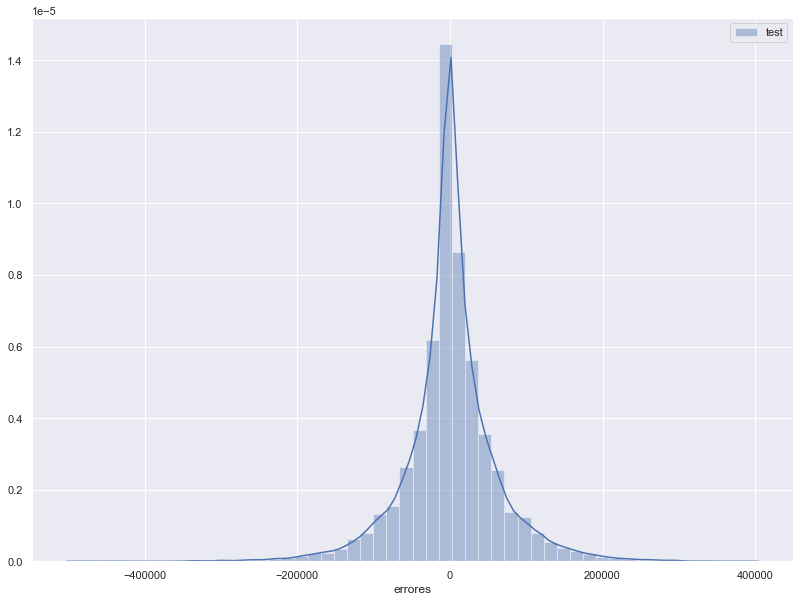

In [63]:
train_maxe = np.mean(scores1['train_r2'])
test_maxe = np.mean(scores1['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = abs(np.mean(scores1['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores1['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()


y_train_pred1 = arbol.predict(X_train)
y_test_pred1 = arbol.predict(X_test)

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot((y_test) -(y_test_pred1).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

### Vecinos mas cercanos (Proyecto 1)


In [64]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
knn_regressor = KNeighborsRegressor(n_neighbors=7,weights='distance',p=1)
knn_regressor.fit(X_train, y_train.values.ravel())

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                    weights='distance')

In [66]:
scores2 = cross_validate(knn_regressor, X_train, y_train.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

El r2 sobre el set de entrenamiento: 0.9559467127037051
El r2 sobre el set de evaluacion: 0.7940263520742441

El error absoluto medio sobre el set de entrenamiento: 8345.141652123139
El error absoluto medio sobre el set de evaluacion: 24584.0708496922



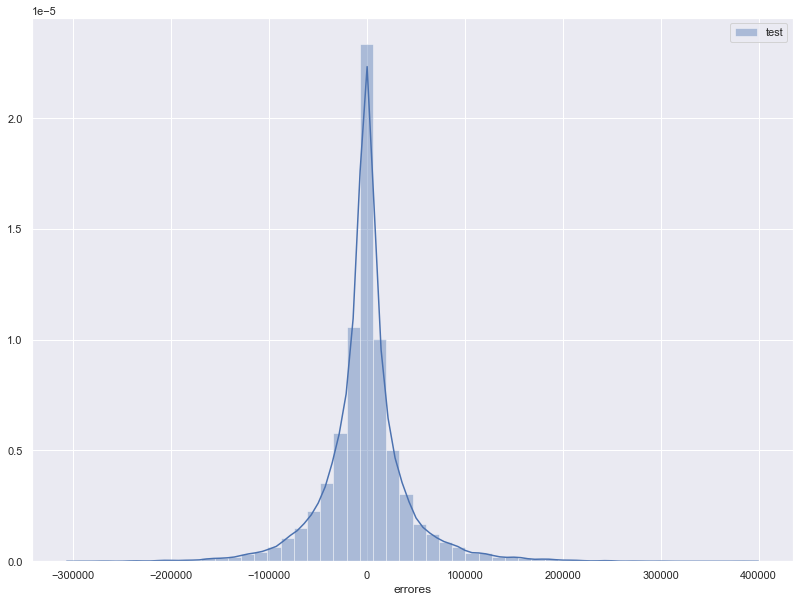

In [67]:
train_maxe = np.mean(scores2['train_r2'])
test_maxe = np.mean(scores2['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = abs(np.mean(scores2['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores2['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

y_train_pred2 = knn_regressor.predict(X_train)
y_test_pred2 = knn_regressor.predict(X_test)

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)

sns.distplot((y_test) -(y_test_pred2).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

#### Si comparamos con los modelos del primer proyecto vemos que mejoraron muchisimo. El R2 subio a 0,79 (la comparacion la realizamos sobre Vecinos mas cercanos que fue nuestro mejor modelo en el proyecto 1) y nuestro error absoluto medio bajo a 24584 (una diferencia de 25305 con respecto al modelo del proyecto 1).  Con respecto al manejo de outliers, nulos, escalado y encodeado de datos podemos decir que mejoraron muchisimo nuestros modelos y que esta justificada su implementacion. Mas adelante probaremos los modelos sin la reduccion de dimensionalidad, que solo la hicimos para reducir el costo computacional, y podremos ver que los modelos van a mejorar aun mas.

.

PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

# Parte B

## Modelos avanzados

#### RANDOMFOREST 

In [68]:
from sklearn.ensemble import RandomForestRegressor


In [69]:
clf = RandomForestRegressor(warm_start=True,n_jobs=-1)
clf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=True)

In [70]:
scores3 = cross_validate(clf, X_train, y_train.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

El r2 sobre el set de entrenamiento: 0.939518736506845
El r2 sobre el set de evaluacion: 0.804999876404408

El error absoluto medio sobre el set de entrenamiento: 13750.202254731921
El error absoluto medio sobre el set de evaluacion: 25245.76556892931



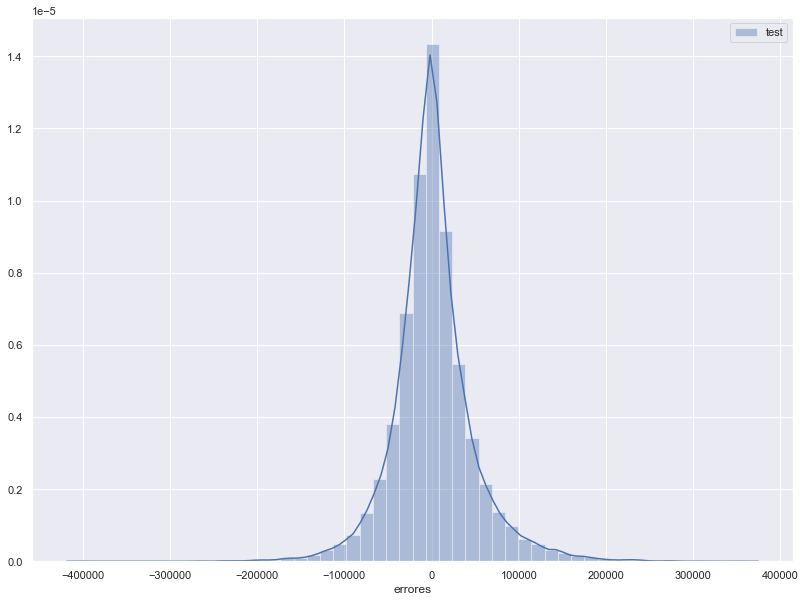

In [71]:
train_maxe = np.mean(scores3['train_r2'])
test_maxe = np.mean(scores3['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = abs(np.mean(scores3['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores3['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

y_train_pred3 = clf.predict(X_train)
y_test_pred3 = clf.predict(X_test)

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)

sns.distplot((y_test) -(y_test_pred3).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

In [72]:
#warm_start=True,n_estimators=1000, min_samples_split=6, min_samples_leaf=1,max_features='auto'

#### XGBOOST

In [73]:
import xgboost as xgb 


In [74]:
xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [75]:
scores4 = cross_validate(xgb, X_train, y_train.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

El r2 sobre el set de entrenamiento: 0.793419702146164
El r2 sobre el set de evaluacion: 0.7451249743067672

El error absoluto medio sobre el set de entrenamiento: 30276.644563858332
El error absoluto medio sobre el set de evaluacion: 33046.43981803412



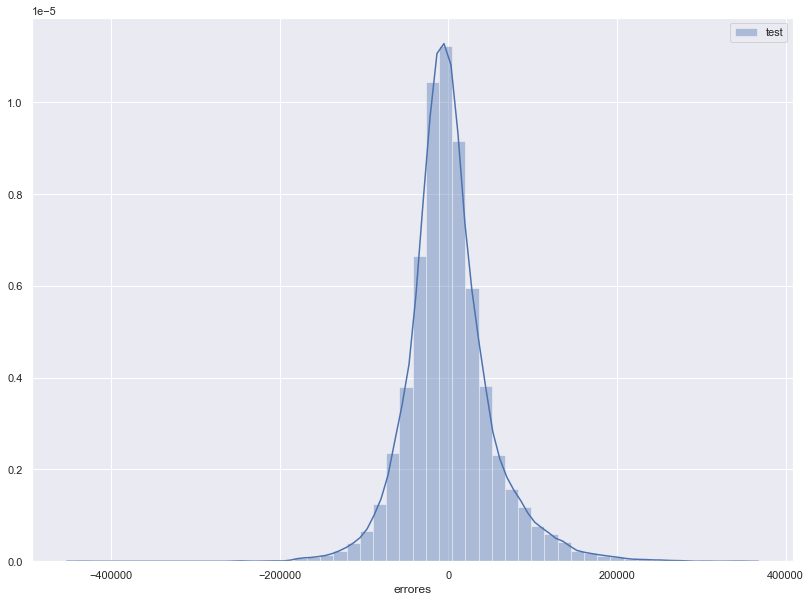

In [76]:
train_maxe = np.mean(scores4['train_r2'])
test_maxe = np.mean(scores4['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = abs(np.mean(scores4['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores4['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

y_train_pred4 = xgb.predict(X_train)
y_test_pred4 = xgb.predict(X_test)


plt.figure(figsize = (30,10))

plt.subplot(1,2,1)

sns.distplot((y_test) -(y_test_pred4).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

## Optimizacion de modelos

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


#### RANDOMFOREST

In [78]:
# 'max_features': ['log2']; 'criterion':['mse']; n_estimators:[300]; max_depth: NO TOCAR;  min_samples_leaf:[1]


In [79]:
parametros= { 'n_estimators':[100,130,150,170,200],'min_samples_leaf':[1],'max_features': ['log2'],
            'min_samples_split':[2],'warm_start':[True] } # max_depth: None es el mejor parametro

In [80]:
#model = RandomForestRegressor(warm_start=True,n_estimators=300,min_samples_leaf=1,max_features='log2',criterion='mse')


In [81]:
model = RandomizedSearchCV(clf,parametros, random_state=0, cv=5,n_jobs=-1)
model.fit(X_train, y_train.values.ravel())

C:\Users\Martin\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [82]:
#scores = cross_validate(model, X_train, y_train.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

In [83]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)


Mejores parametros: {'warm_start': True, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
Mejor Score: 0.8104724905726549



In [84]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,16.8570,0.337077,0.8696,0.328367,True,100,2,1,log2,"{'warm_start': True, 'n_estimators': 100, 'min...",0.811348,0.806119,0.808023,0.812815,0.810966,0.809854,0.002430,5
1,21.2392,0.288691,1.2976,0.234530,True,130,2,1,log2,"{'warm_start': True, 'n_estimators': 130, 'min...",0.811821,0.806530,0.807574,0.813251,0.811272,0.810090,0.002584,3
2,25.0014,0.212738,1.7526,0.321161,True,150,2,1,log2,"{'warm_start': True, 'n_estimators': 150, 'min...",0.811794,0.806232,0.807857,0.812628,0.811204,0.809943,0.002464,4
3,34.2704,7.088104,25.4202,16.168642,True,170,2,1,log2,"{'warm_start': True, 'n_estimators': 170, 'min...",0.811712,0.806577,0.808560,0.813046,0.811958,0.810371,0.002414,2
4,27.1798,9.211767,1.2638,0.785235,True,200,2,1,log2,"{'warm_start': True, 'n_estimators': 200, 'min...",0.811925,0.806810,0.808534,0.813552,0.811542,0.810472,0.002446,1


In [85]:
scores.mean_fit_time.sum()/60

2.0757966645558676

In [86]:
#train_maxe = np.mean(scores['train_r2'])
#test_maxe = np.mean(scores['test_r2'])
#print('El r2 sobre el set de entrenamiento:', train_maxe)
#print('El r2 sobre el set de evaluacion:',test_maxe)
#print()
    
#train_mae = abs(np.mean(scores['train_neg_mean_absolute_error']))
#test_mae = abs(np.mean(scores['test_neg_mean_absolute_error']))
#print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
#print('El error absoluto medio sobre el set de evaluacion:',test_mae)
#print()


El r2 sobre el set de entrenamiento: 0.940041154744116
El r2 sobre el set de evaluacion: 0.7784726156338615

El error absoluto medio sobre el set de entrenamiento: 13553.265718574914
El error absoluto medio sobre el set de evaluacion: 30217.898009563913



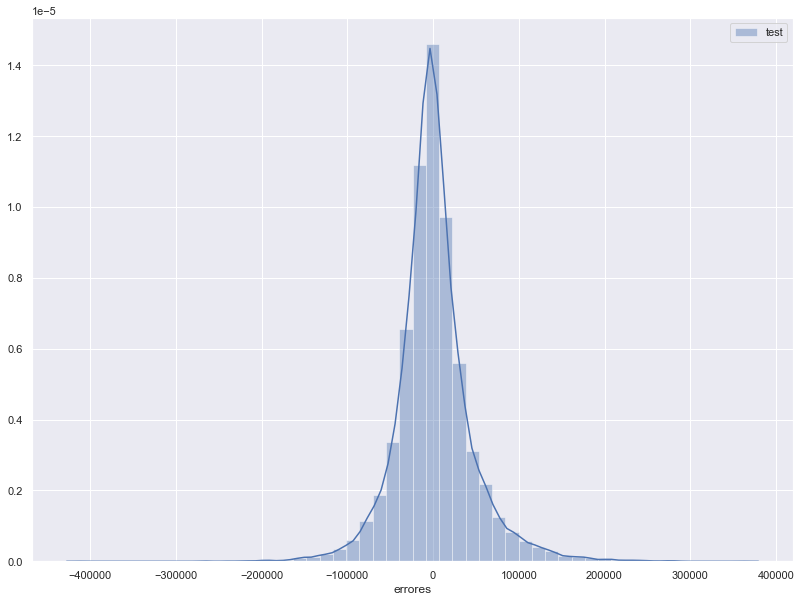

In [87]:
y_train_pred_rfr = model.predict(X_train)
y_test_pred_rfr = model.predict(X_test)

train_maxe = r2_score(y_train, y_train_pred_rfr)
test_maxe = r2_score(y_test, y_test_pred_rfr)

print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = mean_absolute_error(y_train, y_train_pred_rfr)
test_mae = mean_absolute_error(y_test, y_test_pred_rfr)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot((y_test) -(y_test_pred_rfr).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

#### Max depth no lo tocamos ya que con el default siempre nos daba un mejor modelo. En el numero de estimadores se podrian haber usado valores mas altos pero debido al costo computacional nos quedamos con ese rango. Los parametros restantes se dejaron los valores por default ya que eran los que mejor daban. Con respecto a criterion y max features tambien se realizaron optimizaciones pero se dejaron las mejores.

#### XGBOOST

In [88]:
parametros = {
    'gamma':[0,0.1,0.3],         #0.3      
    'learning_rate':[0.1,0.07,0.3],
    'max_depth':[8,10],              #10
    'n_estimators':[800,1000],     #1000
    'alpha':[1e-5, 1e-2,  0.75],  #1e-5
    'subsample':[0.6,0.95,1] }          #0.95      

In [89]:
modelo = RandomizedSearchCV(xgb,parametros, random_state=0, cv=5,n_jobs=-1)
modelo.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100,...
                                          subsample=1, tree_method='exact',
                                          validate_parameters=1,
                                          verbosi

In [90]:
print("Mejores parametros: "+str(modelo.best_params_))
print("Mejor Score: "+str(modelo.best_score_)+'\n')

scores = pd.DataFrame(modelo.cv_results_)

Mejores parametros: {'subsample': 0.95, 'n_estimators': 800, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.3, 'alpha': 0.75}
Mejor Score: 0.8004422720156917



In [91]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,105.1014,0.744048,7.8086,0.098917,0.95,800,10,0.1,0.3,0.75,"{'subsample': 0.95, 'n_estimators': 800, 'max_...",0.801506,0.794637,0.798148,0.804506,0.803414,0.800442,0.003618,1
1,102.0174,0.585259,6.3032,0.879874,1,1000,8,0.3,0.1,1e-05,"{'subsample': 1, 'n_estimators': 1000, 'max_de...",0.798712,0.785346,0.790085,0.798798,0.800806,0.794749,0.005983,6
2,106.8162,1.367423,6.1330,0.237871,0.6,1000,8,0.07,0,1e-05,"{'subsample': 0.6, 'n_estimators': 1000, 'max_...",0.787322,0.781370,0.785581,0.793038,0.787750,0.787012,0.003764,8
3,132.0236,1.807697,7.1700,0.339682,0.95,1000,10,0.07,0.1,0.75,"{'subsample': 0.95, 'n_estimators': 1000, 'max...",0.801517,0.795086,0.797152,0.804668,0.803004,0.800285,0.003605,2
4,101.8222,0.463795,4.9666,0.375557,1,800,10,0.3,0,0.01,"{'subsample': 1, 'n_estimators': 800, 'max_dep...",0.795286,0.789326,0.793116,0.801347,0.798467,0.795508,0.004168,4
5,130.9016,0.802952,7.6830,0.066915,0.6,1000,10,0.1,0.1,0.01,"{'subsample': 0.6, 'n_estimators': 1000, 'max_...",0.797380,0.790277,0.796333,0.802674,0.798692,0.797071,0.004021,3
6,103.4756,1.599102,4.3210,0.067002,1,1000,8,0.3,0.3,1e-05,"{'subsample': 1, 'n_estimators': 1000, 'max_de...",0.798712,0.785346,0.790085,0.798798,0.800806,0.794749,0.005983,6
7,104.6450,0.622672,5.8784,0.086830,0.6,800,10,0.07,0,0.75,"{'subsample': 0.6, 'n_estimators': 800, 'max_d...",0.793604,0.788383,0.793568,0.800117,0.798284,0.794791,0.004112,5
8,107.0634,0.445194,5.5634,0.130172,0.6,1000,8,0.3,0.1,1e-05,"{'subsample': 0.6, 'n_estimators': 1000, 'max_...",0.782877,0.771798,0.783550,0.786226,0.785303,0.781951,0.005215,10
9,96.2794,13.373736,4.5454,1.095138,0.6,1000,8,0.07,0.1,0.01,"{'subsample': 0.6, 'n_estimators': 1000, 'max_...",0.787322,0.781370,0.785581,0.793038,0.787750,0.787012,0.003764,8


In [92]:
scores.mean_fit_time.sum()/60

18.16909667253494

El r2 sobre el set de entrenamiento: 0.9169571167675874
El r2 sobre el set de evaluacion: 0.7589074287748818

El error absoluto medio sobre el set de entrenamiento: 18111.03328039699
El error absoluto medio sobre el set de evaluacion: 32021.48254464286



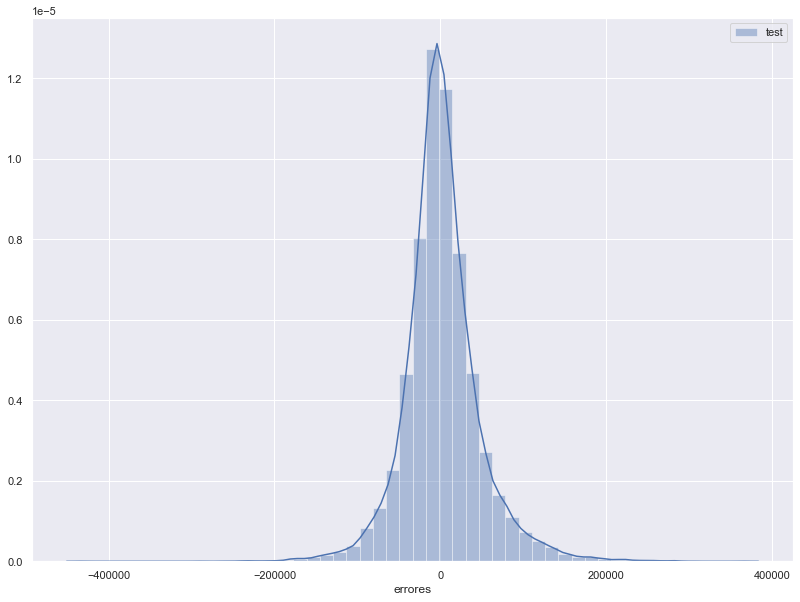

In [93]:
y_train_pred_xgb = modelo.predict(X_train)
y_test_pred_xgb = modelo.predict(X_test)

train_maxe = r2_score(y_train, y_train_pred_xgb)
test_maxe = r2_score(y_test, y_test_pred_xgb)

print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print()
    
train_mae = mean_absolute_error(y_train, y_train_pred_xgb)
test_mae = mean_absolute_error(y_test, y_test_pred_xgb)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()


plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot((y_test) -(y_test_pred_xgb).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

#### Lo mismo para n estimators y max depth se podria haber abarcado un mayor rango pero debido al costo computacional se tuvo que reducir. En cuanto a los demas parametros busque en internet informacion sobre que parametros modificar en un caso similar al que estabamos estudiando. Igual realizamos una modificacion de los rangos de cada uno y por medio de muchas iteraciones se fue llegando a esos valores.

## Modelos sin la reduccion de dimensionalidad

In [94]:
from sklearn.model_selection import train_test_split


X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
X_train1= scaler.fit_transform(X_train1)
X_test1= scaler.transform(X_test1)

#### Arbol

In [96]:
arbol1 = DecisionTreeRegressor(max_depth=23, random_state=42)
arbol1.fit(X_train1, y_train1.values.ravel())

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=23,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [97]:
scores1 = cross_validate(arbol1, X_train1, y_train1.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

In [98]:
train_maxe = np.mean(scores1['train_r2'])
test_maxe = np.mean(scores1['test_r2'])
print('El r2 sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_maxe, scores1['train_r2'].std()))
print('El r2 sobre el set de evaluacion:  %0.5f (+/- %0.5f)'%(test_maxe, scores1['test_r2'].std()))
print()
    
train_mae = abs(np.mean(scores1['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores1['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_mae,scores1['test_neg_mean_absolute_error'].std()))
print('El error absoluto medio sobre el set de evaluacion: %0.5f (+/- %0.5f)'%(test_mae,scores1['test_neg_mean_absolute_error'].std()))
print()


y_train_pred1 = arbol1.predict(X_train1)
y_test_pred1 = arbol1.predict(X_test1)

El r2 sobre el set de entrenamiento: 0.90716 (+/- 0.00276)
El r2 sobre el set de evaluacion:  0.76624 (+/- 0.00517)

El error absoluto medio sobre el set de entrenamiento: 16497.72797 (+/- 440.00514)
El error absoluto medio sobre el set de evaluacion: 28081.25996 (+/- 440.00514)



#### Vecinos

In [99]:
knn_regressor1 = KNeighborsRegressor(n_neighbors=7,weights='distance',p=1)
knn_regressor1.fit(X_train1, y_train1.values.ravel())

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                    weights='distance')

In [100]:
scores2= cross_validate(knn_regressor1, X_train1, y_train1.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

In [101]:
train_maxe = np.mean(scores2['train_r2'])
test_maxe = np.mean(scores2['test_r2'])
print('El r2 sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_maxe, scores2['train_r2'].std()))
print('El r2 sobre el set de evaluacion:  %0.5f (+/- %0.5f)'%(test_maxe, scores2['test_r2'].std()))
print()
    
train_mae = abs(np.mean(scores2['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores2['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_mae,scores2['test_neg_mean_absolute_error'].std()))
print('El error absoluto medio sobre el set de evaluacion: %0.5f (+/- %0.5f)'%(test_mae,scores2['test_neg_mean_absolute_error'].std()))
print()

y_train_pred2 = knn_regressor1.predict(X_train1)
y_test_pred2 = knn_regressor1.predict(X_test1)

El r2 sobre el set de entrenamiento: 0.95582 (+/- 0.00062)
El r2 sobre el set de evaluacion:  0.82613 (+/- 0.00245)

El error absoluto medio sobre el set de entrenamiento: 8357.76071 (+/- 191.81929)
El error absoluto medio sobre el set de evaluacion: 22690.25340 (+/- 191.81929)



In [102]:
y_train_pred2 = knn_regressor1.predict(X_train1)
y_test_pred2 = knn_regressor1.predict(X_test1)

#### Random Forest

In [103]:
clf1 = RandomForestRegressor(warm_start=True,n_estimators=170,min_samples_split=2,min_samples_leaf=1,max_features='log2')
clf1.fit(X_train1, y_train1.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=170, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=True)

In [104]:
scores3 = cross_validate(clf1, X_train1, y_train1.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

In [105]:
train_maxe = np.mean(scores3['train_r2'])
test_maxe = np.mean(scores3['test_r2'])
print('El r2 sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_maxe, scores3['train_r2'].std()))
print('El r2 sobre el set de evaluacion:  %0.5f (+/- %0.5f)'%(test_maxe, scores3['test_r2'].std()))
print()
    
train_mae = abs(np.mean(scores3['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores3['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_mae, scores3['test_neg_mean_absolute_error'].std()))
print('El error absoluto medio sobre el set de evaluacion: %0.5f (+/- %0.5f)'%(test_mae, scores3['test_neg_mean_absolute_error'].std()))
print()


y_train_pred3 = clf1.predict(X_train1)
y_test_pred3 = clf1.predict(X_test1)

El r2 sobre el set de entrenamiento: 0.94478 (+/- 0.00045)
El r2 sobre el set de evaluacion:  0.84193 (+/- 0.00224)

El error absoluto medio sobre el set de entrenamiento: 12892.07904 (+/- 218.21512)
El error absoluto medio sobre el set de evaluacion: 22882.21984 (+/- 218.21512)



#### XGB

In [106]:
import xgboost as xgb 


In [107]:
xgb1=xgb.XGBRegressor(subsample=0.95,n_estimators=1000,max_depth=10,learning_rate=0.1,gamma=0.3,alpha=0.75)
xgb1.fit(X_train1, y_train1.values.ravel())

XGBRegressor(alpha=0.75, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.75,
             reg_lambda=1, scale_pos_weight=1, subsample=0.95,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
scores4 = cross_validate(xgb1, X_train1, y_train1.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

In [109]:
train_maxe = np.mean(scores4['train_r2'])
test_maxe = np.mean(scores4['test_r2'])
print('El r2 sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_maxe, scores4['train_r2'].std()))
print('El r2 sobre el set de evaluacion:  %0.5f (+/- %0.5f)'%(test_maxe, scores4['test_r2'].std()))
print()
    
train_mae = abs(np.mean(scores4['train_neg_mean_absolute_error']))
test_mae = abs(np.mean(scores4['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento: %0.5f (+/- %0.5f)'%(train_mae,scores4['test_neg_mean_absolute_error'].std()))
print('El error absoluto medio sobre el set de evaluacion: %0.5f (+/- %0.5f)'%(test_mae,scores4['test_neg_mean_absolute_error'].std()))
print()

y_train_pred4 = xgb1.predict(X_train1)
y_test_pred4 = xgb1.predict(X_test1)


El r2 sobre el set de entrenamiento: 0.93810 (+/- 0.00095)
El r2 sobre el set de evaluacion:  0.83659 (+/- 0.00424)

El error absoluto medio sobre el set de entrenamiento: 14520.25872 (+/- 239.55937)
El error absoluto medio sobre el set de evaluacion: 23706.23692 (+/- 239.55937)



#### Como conclusion si bien en los modelos avanzados tenemos un mejor R2, en el modelo de vecinos mas cercanos tenemos apenas menor error absoluto medio y la distribucion de errores es un poco mejor. En mi opinion elegiria el Random Forest porque con parametros bajos tiene un bajo costo computacional y una muy buena performance, en cambio el modelo de vecinos mas cercanos no se puede optimizar mas y tiene un mayor costo computacional. Igual se podria introducir un mayor rango de parametros en Random Forest y conseguiriamos un mejor modelo, pero el costo computacional era muy grande por eso no se llevo a cabo.

.

PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

# Parte C

## Importancia de features

In [110]:
print('Para Arbol de decision:')
print(arbol.feature_importances_)
print()
print('Para Random forest:')
print(clf.feature_importances_)
print()
print('Para XGB:')
print(modelo.best_estimator_.feature_importances_)
print()

Para Arbol de decision:
[0.15349898 0.61538397 0.23111705]

Para Random forest:
[0.15367246 0.61540353 0.23092402]

Para XGB:
[0.09287654 0.6737738  0.23334974]



#### Debido a que reducimos la dimensionalidad de los datos, ya no sabemos que representan esas features. Entonces lo conveniente es entrenar los modelos sin reducir la dimensionalidad para poder seguir trabajando con las features originales y ver cuales fueron relevantes para el modelo.

In [111]:
feature=arbol1.feature_importances_
features=pd.DataFrame(data=feature)
columnass=X.columns
importante=pd.DataFrame(data=features.values,index=columnass,columns=['Importancia'])
importante.sort_values('Importancia',ascending=False,inplace=True)
importante.head(15)

,Importancia
bathrooms,0.383216
surface_total,0.204006
surface_covered,0.131843
Capital Federal,0.032519
Palermo,0.026249
Departamento,0.024119
rooms,0.018806
Puerto Madero,0.017332
Belgrano,0.017052
bedrooms,0.015750


In [112]:
feature=clf1.feature_importances_
features=pd.DataFrame(data=feature)
columnass=X.columns
importante=pd.DataFrame(data=features.values,index=columnass,columns=['Importancia'])
importante.sort_values('Importancia',ascending=False,inplace=True)
importante.head(15)

,Importancia
surface_total,0.224841
surface_covered,0.203458
bathrooms,0.143167
rooms,0.092156
bedrooms,0.074966
Palermo,0.023806
Belgrano,0.016876
Recoleta,0.015529
Puerto Madero,0.015339
Bs.As. G.B.A. Zona Oeste,0.015042


In [113]:
feature=xgb1.feature_importances_
features=pd.DataFrame(data=feature)
columnass=X.columns
importante=pd.DataFrame(data=features.values,index=columnass,columns=['Importancia'])
importante.sort_values('Importancia',ascending=False,inplace=True)
importante.head(15)

,Importancia
Puerto Madero,0.122060
Capital Federal,0.094239
bathrooms,0.047057
Las Cañitas,0.040236
Villa Lugano,0.032438
Palermo,0.030886
Belgrano,0.028567
Recoleta,0.027340
Nuñez,0.025451
Bs.As. G.B.A. Zona Oeste,0.025232


#### Como vemos dependiendo del modelo, es la importancia de las features. Para los arboles de decision, bathrooms, surface total y surface covered son por lejos las mas importantes. En cambio para XGBoost  le da mas importancia a los barrios y las zonas.

#### Es lo que me esperaba en los arboles porque siempre tuvieron una alta correlacion con el precio las superficies y los baños. Lo que me sorprendio fue en XGBOOST es que le dio mayor importancia a las zonas y los barrios cuando su correlacion era muy baja.

## Distribucion de errores

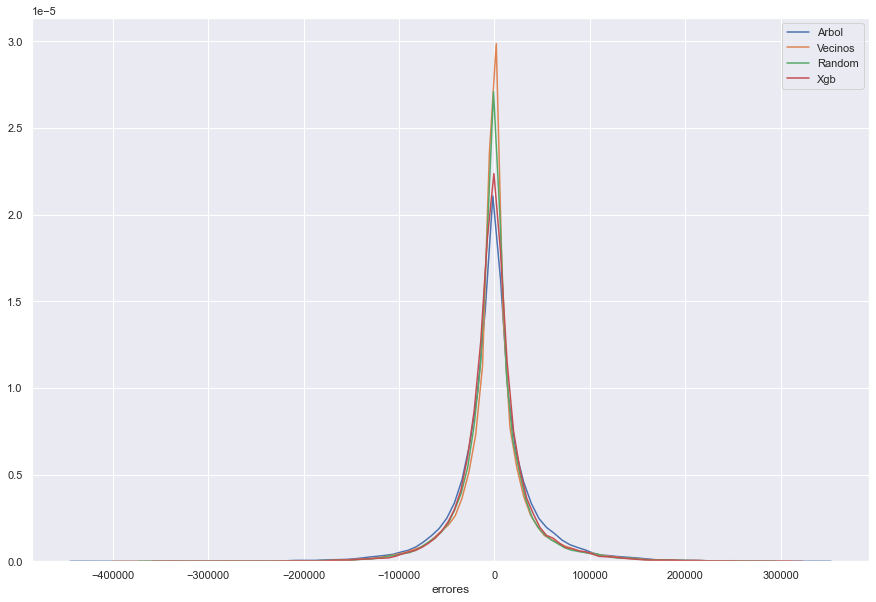

In [114]:
plt.figure(figsize = (15,10))
sns.distplot((y_test) -(y_test_pred1).reshape(-1,1), bins = 50, label = 'Arbol',hist=False)
sns.distplot((y_test) -(y_test_pred2).reshape(-1,1), bins = 50, label = 'Vecinos',hist=False)
sns.distplot((y_test) -(y_test_pred3).reshape(-1,1), bins = 50, label = 'Random',hist=False)
sns.distplot((y_test) -(y_test_pred4).reshape(-1,1), bins = 50, label = 'Xgb',hist=False)
plt.xlabel('errores')
plt.legend()

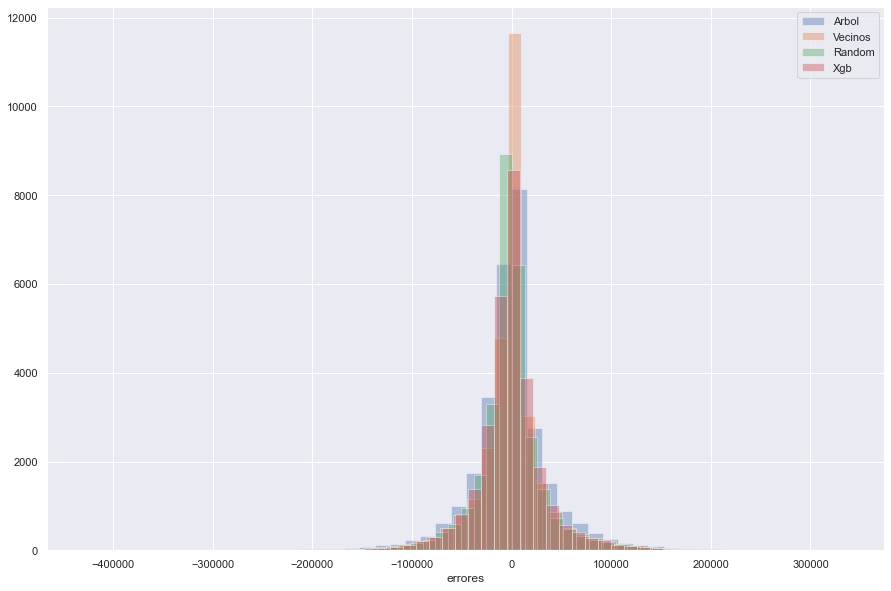

In [115]:
plt.figure(figsize = (15,10))
sns.distplot((y_test) -(y_test_pred1).reshape(-1,1), bins = 50, label = 'Arbol',kde=False)
sns.distplot((y_test) -(y_test_pred2).reshape(-1,1), bins = 50, label = 'Vecinos',kde=False)
sns.distplot((y_test) -(y_test_pred3).reshape(-1,1), bins = 50, label = 'Random',kde=False)
sns.distplot((y_test) -(y_test_pred4).reshape(-1,1), bins = 50, label = 'Xgb',kde=False)
plt.xlabel('errores')
plt.legend()

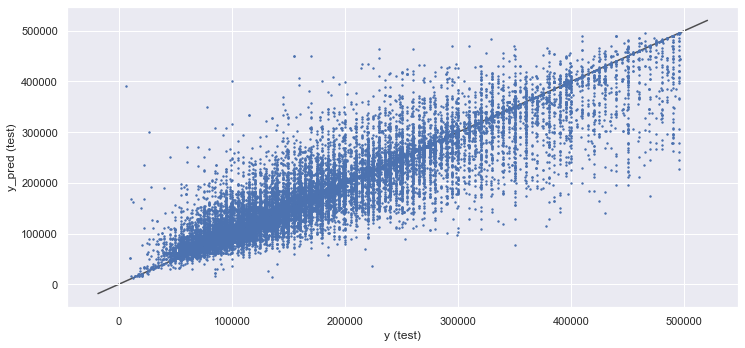

In [116]:
plt.figure(figsize = (20,5))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred2, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

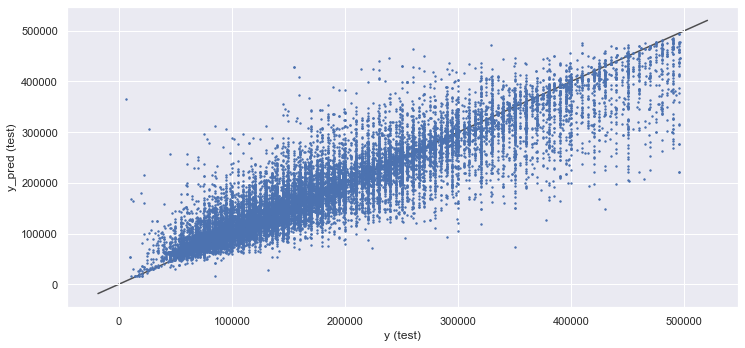

In [117]:
plt.figure(figsize = (20,5))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred3, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

#### Podemos ver que el modelo los dos modelos mas exactos (vecinos mas cercanos y random forest) fallan en lo mismo. Los precios mayores son mas dificiles de predecir para los modelos. Como podemos ver en los histogramas que las columnas de la derecha del centro son un poco mas altas que las de la izquierda, y en el scatter que vemos que las predicciones de precios mas altos estan mas alejadas de la recta. Yo creo que esto se debe a que tenemos pocos datos con precios altos por eso el modelo falla ahi.

## Criticas a la metodologia utilizada

#### Al trabajar con un dataset muy grande el costo cumputacional fue un gran limitante.

#### Se podrian haber incluidos funciones para la implementacion de los modelos para ahorrar codigo. Tambien se deberian probrar los modelos avanzados con un rango mayor en los parametros para mejorarlos. 
#### Con respecto al manejo de nulos se podria haber usado un Knn Imputer para mejorar la precision de la imputacion de nulos con un KNN imputer.

#### Se puede agregar todo el analisis de las features que se realizo en el Proyecto 1 para que este mas completo. 

## Clustering 

In [60]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97999 entries, 0 to 97998
Columns: 108 entries, rooms to PH
dtypes: float64(5), uint8(103)
memory usage: 13.4 MB


In [62]:
X3= scaler.fit_transform(X)
pca = PCA(n_components=2)
X2=pca.fit_transform(X3)
X3=pd.DataFrame(X2,columns=['A','B'])
X3['property_type']=data_copia['property_type']

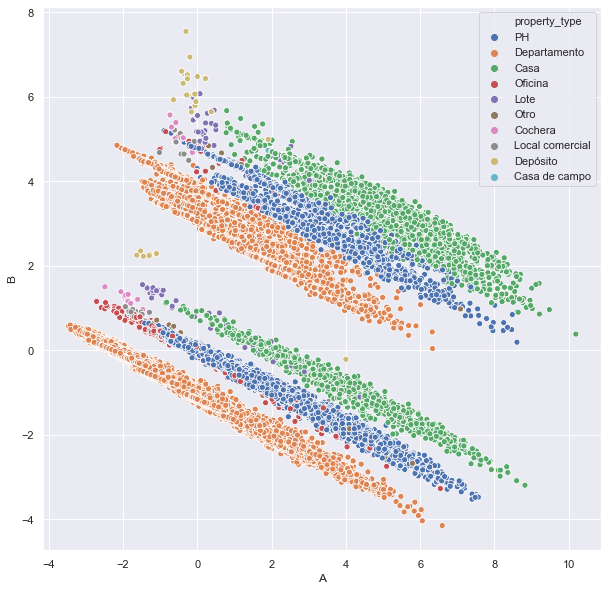

In [63]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = X3['A'], y = X3['B'],hue=X3['property_type'])
plt.show()

In [64]:
X3= scaler.fit_transform(X)
pca = PCA(n_components=2)
X2=pca.fit_transform(X3)
X3=pd.DataFrame(X2,columns=['A','B'])
X3['l2']=data_copia['l2']

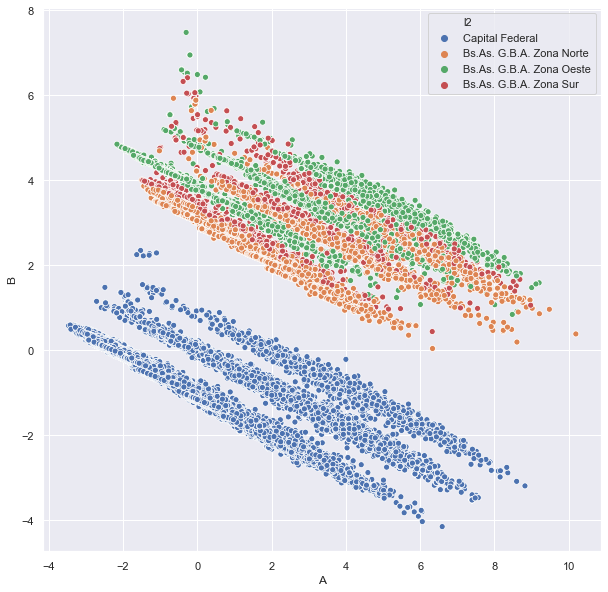

In [65]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = X3['A'], y = X3['B'],hue=X3['l2'])
plt.show()

In [75]:
X_clus=X3[['A','B']]

In [76]:
db=DBSCAN(eps=0.5, min_samples=10)

In [77]:
kmeans_1 = KMeans(n_clusters=4, random_state=0)

In [78]:
kmeans_1.fit(X_clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [79]:
etiquetas_1 = kmeans_1.labels_
centros_1 = kmeans_1.cluster_centers_

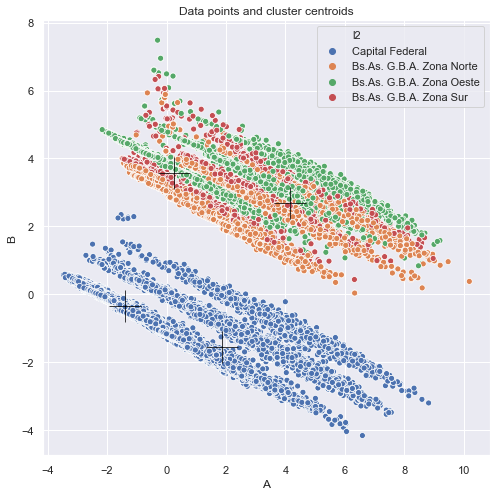

In [80]:
plt.figure(figsize = (8,8))
sns.scatterplot(X_clus['A'], X_clus['B'], hue = X3['l2'])
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

#### Aplicamos una reduccion de dimensionalidad y un escalado de datos para tener una mejor visualizacion. Con respecto al tipo de propiedad no tenemos una separacion tan clara, ya que si bien tenemos dos clusters bien marcados, los tipo de propiedad estan mezclados en todos ellos. Luego hicimos una clusterizacion con respecto a la zonas y tenemos dos clusters bien diferenciados.  Por un lado tenemos Capital Federal y por el otro la Provincia de Buenos Aires, es la separacion que mejor se visualiza.   Como vemos en el grafico K-means no es muy bueno para separar los clusters pero creo firmemente que DB-Scan separa los clusters bien (no pude correr DB-Scan porque se saturaba la computadora).